<a href="https://colab.research.google.com/github/dilliraj1987/Ex5_MNIST/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Required Libraries**

In [ ]:
import numpy as np # Importing Numpy
import pandas as pd # Importing Pandas
import matplotlib.pyplot as plt # Import Matlab library for plotting
%matplotlib inline
from keras.datasets import mnist # Importing Sample dataset MNIST from keras.datasets
from keras.models import Sequential # Improting Sequential function from keras.models
from keras.layers import Dense, Dropout, Activation # Importing Dense, Dropout, Activation functions from keras,layers
from keras.utils import np_utils # Importing np_utils from keras.utils

np.random.seed(35) # Random seeding of data at every 35 random sequences

## **Spliting Train, Test data from MNIST and Display the shape of an image**

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # Splitting of MNIST dataset as Train and Test
print("X_train original shape", X_train.shape) # To display total no. of X_train data and its shape
print("y_train original shape", y_train.shape) # To display total no. of y_train data and its shape
print("X_test original shape", X_test.shape) # To display total no. of X_test data and its shape
print("y_test original shape", y_test.shape) # To display total no. of y_test data and its shape

11501568/11490434 [==============================] - 0s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5, 1.0, '0')

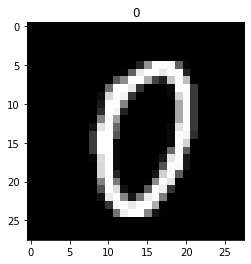

In [ ]:
plt.imshow(X_train[1000], cmap='gray') # Display X_train's 1000 index array data in grayscale 
plt.title(y_train[1000]) # Display the title from y_train 1000 index data

Text(0.5, 1.0, '7')

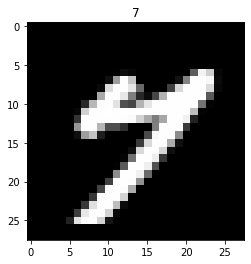

In [ ]:
plt.imshow(X_train[1001], cmap='gray') # Display X_train's 1001 index array data in grayscale
plt.title(y_train[1001]) # Display the title from y_train 1001 index data

Text(0.5, 1.0, '1')

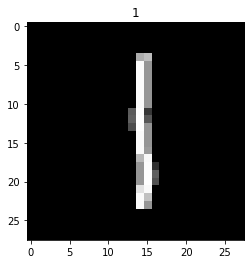

In [ ]:
plt.imshow(X_train[1002], cmap='gray') # Display X_train's 1002 index array data in grayscale
plt.title(y_train[1002]) # Display the title in y_train 1002 index data

Text(0.5, 1.0, '1')

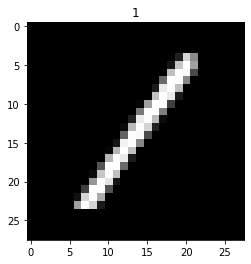

In [ ]:
plt.imshow(X_train[1003], cmap='gray') # Display X_train's 1003 index array data in grayscale
plt.title(y_train[1003]) # Display the title in y_train 1003 index data

In [ ]:
X_train = X_train.reshape(60000,784) # X_train data in single dimension with vector size as 784 for 60000 data points
X_test = X_test.reshape(10000,784) # X_test data in single dimension with vector size as 784 for 10000 data points

X_train = X_train.astype('float32') # To Represent X_train value in floating point for normalization
X_test = X_test.astype('float32') # To Represent X_test value in floating point for normalization

X_train/=255 # To normalizing the X_train vector data
X_test/=255 # To normalizing the X_test vector data

## **Encoding data**

In [ ]:
number_of_classes = 10 # Declaring Output in ten classes

Y_train = np_utils.to_categorical(y_train, number_of_classes) # We use to_categorial method of Numpy utilities to perform encoding for y_train
Y_test = np_utils.to_categorical(y_test, number_of_classes) # We use to_categorial method of Numpy utilities to perform encoding for y_test

y_train[10], Y_train[10] # Result of encoding for 10 classes displayed with this command

(3, array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32))

## **Preparation of Model for Prediction**

In [ ]:
model = Sequential() # Calling sequential function

model.add(Dense(512, input_dim=784,activation='relu')) # Dense layer1 with 512 hidden layers as 784 input_dimensions, Activation function = relu for hidden layers
# An "activation" is just a non-linear function applied to the output
# of the layer above. Here, with a "rectified linear unit",
# we clamp all values below 0 to 0.
#model.add(Activation('relu'))
# Dropout helps protect the model from memorizing or "overfitting" the training data
#model.add(Dropout(0.2))

model.add(Dense(256,activation='relu')) # Dense layer1 with 256 hidden layers, Activation function = relu for hidden layers
#model.add(Activation('relu'))
#model.add(Dropout(0.2))

model.add(Dense(128,activation='relu')) # Dense layer1 with 128 hidden layers, Activation function = relu for hidden layers
#model.add(Activation('relu'))
#model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax')) # 10 Output Dense layer with Activation function of softmax for multiclass classification
# This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.
#model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Compiling done with the 'adam'(Adaptable Optimizer); Loss = categorical_crossentropy; metric evaluation = accuracy

In [ ]:
model.summary() # Display Summary of sequential model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


## **Parameter Calculation**
Parameters expression = No. of inputs * No. of hidden layers + No. of outputs
Dense = 784*512+512 = 401920
Dense_1 = 512*256+256 = 131328
Dense_2 = 256*128+128 = 32896
Dense_3 = 128*10+10 = 129

Total Trainable Parameters = 567434


In [ ]:
size = int(len(X_train) * 0.8) # Defining the size of the X_train data as 80%

train_x, val_x = X_train[:size], X_train[size:] # train_x - 80% and validation_x - 80% 
train_y, val_y = Y_train[:size], Y_train[size:] # train_y - 20% and validation_y - 20%

In [ ]:
hist = model.fit(train_x, train_y, batch_size=128, epochs=20, validation_data=(val_x, val_y)) # Evaluation of Performance Metric accuracy for both train and validation data

Epoch 1/20
375/375 [==============================] - 6s 14ms/step - loss: 0.2603 - accuracy: 0.9238 - val_loss: 0.1237 - val_accuracy: 0.9620
Epoch 2/20
375/375 [==============================] - 5s 13ms/step - loss: 0.0907 - accuracy: 0.9722 - val_loss: 0.1047 - val_accuracy: 0.9677
Epoch 3/20
375/375 [==============================] - 5s 13ms/step - loss: 0.0605 - accuracy: 0.9809 - val_loss: 0.0912 - val_accuracy: 0.9725
Epoch 4/20
375/375 [==============================] - 5s 13ms/step - loss: 0.0412 - accuracy: 0.9867 - val_loss: 0.0911 - val_accuracy: 0.9732
Epoch 5/20
375/375 [==============================] - 8s 20ms/step - loss: 0.0301 - accuracy: 0.9904 - val_loss: 0.0954 - val_accuracy: 0.9741
Epoch 6/20
375/375 [==============================] - 10s 26ms/step - loss: 0.0269 - accuracy: 0.9915 - val_loss: 0.0946 - val_accuracy: 0.9745
Epoch 7/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0232 - accuracy: 0.9925 - val_loss: 0.0909 - val_accuracy: 0.976

## **Evaluation of Performance Metrics**

In [ ]:
score = model.evaluate(X_test, Y_test) # Evaluation of Testing accuracy
print()
print('Test accuracy: ', score[1]) # Display Test accuracy result

313/313 [==============================] - 1s 4ms/step - loss: 0.0974 - accuracy: 0.9801

Test accuracy:  0.9800999760627747


In [ ]:
import numpy as np
from keras.preprocessing import image
#test_image = image.load_img('X_test[1000]')
#test_image = image.img_to_array(test_image)
#test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(X_train)
#predictions = lm.predict(X_test)

In [ ]:
result[1000] # Result output of 1000 indexed data

array([1.00000000e+00, 3.74477713e-15, 1.06235587e-09, 6.87882402e-15,
       2.22088430e-14, 1.00036536e-13, 2.62460098e-09, 4.99481316e-12,
       3.74257239e-14, 4.94229588e-11], dtype=float32)

In [ ]:
result[1001] # Result output of 1001 indexed data

array([1.1029267e-11, 5.1104809e-09, 6.8345498e-09, 5.8191651e-10,
       1.4470749e-09, 1.1536252e-09, 1.7107326e-09, 1.0000000e+00,
       1.4478023e-11, 5.6514725e-08], dtype=float32)